# MOVIE RATING PREDICTION WITH PYTHON

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/AKASH HN/Downloads/IMDb Movies India.csv",encoding='latin-1')
data = data.dropna()
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Text(0.5, 0, 'Rating')

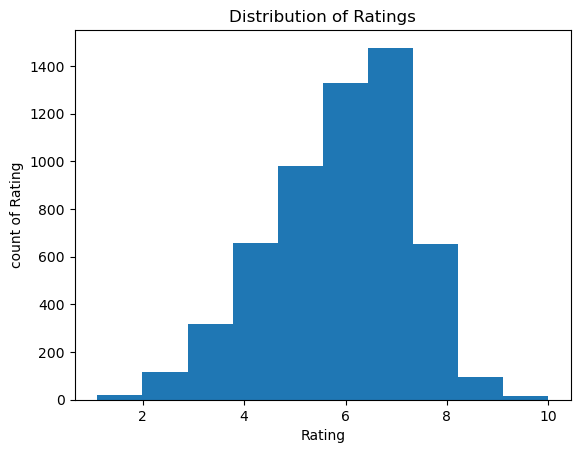

In [3]:
data.Rating.plot.hist(bins=10)
plt.title("Distribution of Ratings")
plt.ylabel('count of Rating')
plt.xlabel('Rating')

In [4]:
# Converting Categorical to Numerical by applying Label Encoder
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,88,9,229,56,1843,629,1352,2272,319
3,1,88,10,184,30,1164,1335,1198,719,2148
5,3,66,47,157,33,1892,1530,378,75,2045
6,4,74,42,289,60,34,2044,692,1112,2524
8,76,81,156,320,42,1133,135,1934,1175,1013


<Axes: >

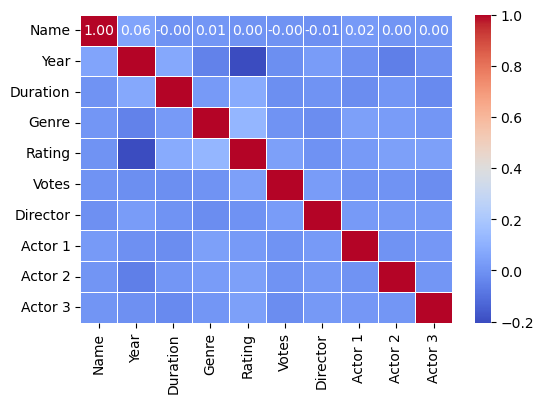

In [5]:
corr = data.corr()
plt.figure(figsize = (6,4))
sns.heatmap(corr,annot = True, cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)

Variable influencing rating

In [6]:
corr['Rating'].abs().sort_values(ascending = False)

Rating      1.000000
Year        0.204761
Genre       0.121694
Duration    0.078559
Actor 3     0.042417
Votes       0.041836
Actor 2     0.041412
Actor 1     0.023444
Director    0.006921
Name        0.000799
Name: Rating, dtype: float64

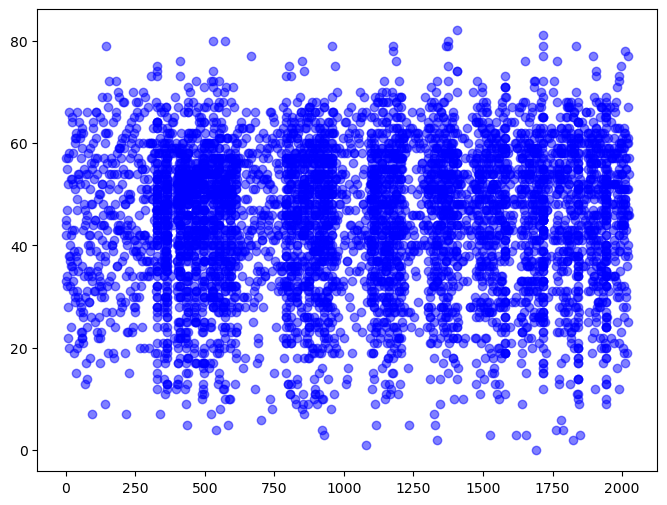

In [7]:
ht = data['Votes']
st = data['Rating']
plt.figure(figsize = (8,6))
plt.scatter(ht,st,color = 'blue',alpha = 0.5)
plt.show()

Varience influence

In [8]:

data_vif = data.drop('Rating',axis =1)
vif_data = pd.DataFrame()
vif_data['Features'] = data_vif.columns
vif_data['VIF'] = [variance_inflation_factor(data_vif.values,i) for i in range(len(data_vif.columns))]
print(vif_data)

   Features       VIF
0      Name -0.106380
1      Year  8.176126
2  Duration  2.422702
3     Genre  3.271006
4     Votes -0.314142
5  Director -0.666485
6   Actor 1 -0.767234
7   Actor 2  0.661177
8   Actor 3 -0.228134


In [9]:
features = data.drop('Rating',axis = 1)
labels = data['Rating']

In [10]:
# Ordinary least Square
model = sm.OLS(labels,features).fit()

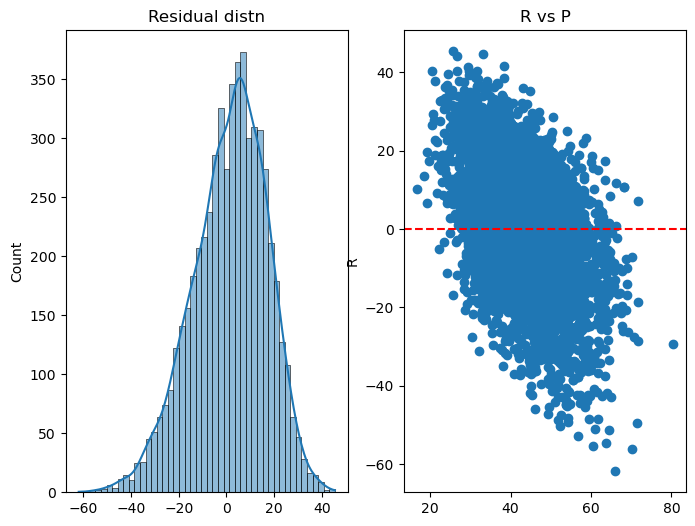

Model coef: 
 Name        0.001415
Year        0.091374
Duration    0.066007
Genre       0.034282
Votes       0.005931
Director    0.003069
Actor 1     0.004340
Actor 2     0.004363
Actor 3     0.004213
dtype: float64


In [11]:

residual = model.resid
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
sns.histplot(residual,kde = True)
plt.title('Residual distn')

plt.subplot(1,2,2)
plt.scatter(model.predict(features),residual)
plt.axhline(y = 0,color = 'red',linestyle = '--')
plt.title('R vs P')
plt.ylabel('R')
plt.show()

print('Model coef: \n',model.params)

In [12]:
prediction = model.predict(features)
print('r2: ',r2_score(labels,prediction))
print('MSE: ',mean_squared_error(labels,prediction))

r2:  -0.271458139934464
MSE:  242.31662749396963


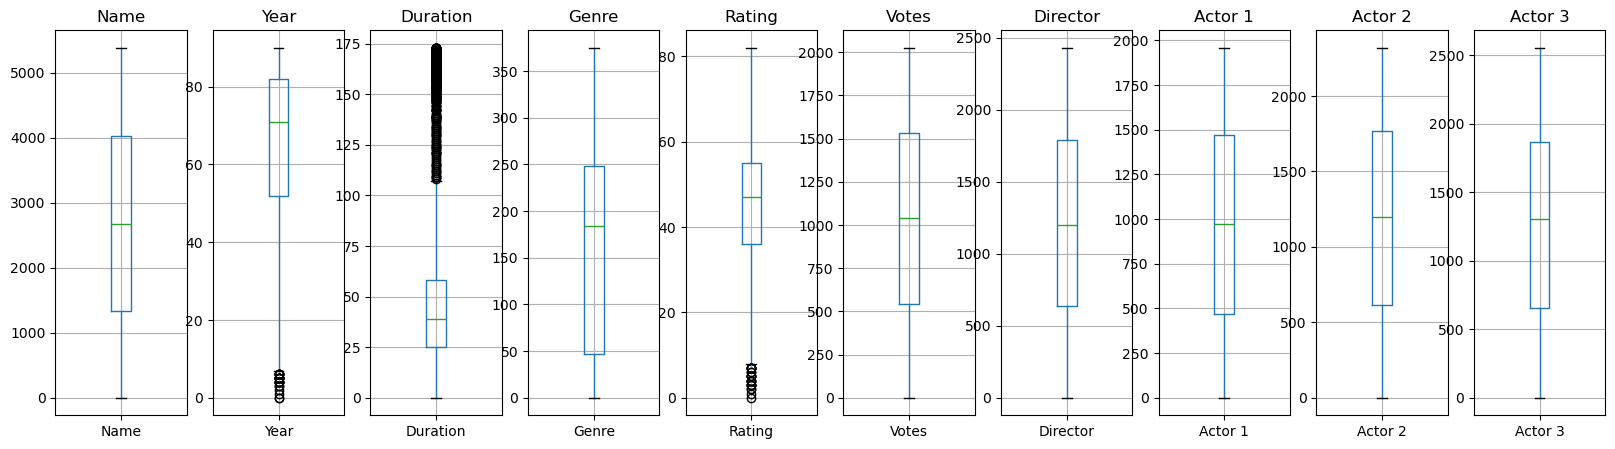

In [13]:
def plot_boxplot(df):
    fig,axes = plt.subplots(1,len(df.columns),figsize = (20,5))
    for i , col_name in enumerate(df.columns):
        df.boxplot(column = col_name , ax = axes[i])
        axes[i].set_title(col_name)
    plt.show()
plot_boxplot(data)

In [14]:
def rem_outlier(df):
    new_df = df.copy()
    for col in df.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        IQR = q3 - q1
        lower = q1 - 1.5*IQR
        upper = q3 + 1.5*IQR
        new_df[col] = new_df[col].apply(lambda x: lower if x<lower
                                       else upper if x>upper else x)
    return new_df
new_data = rem_outlier(data)

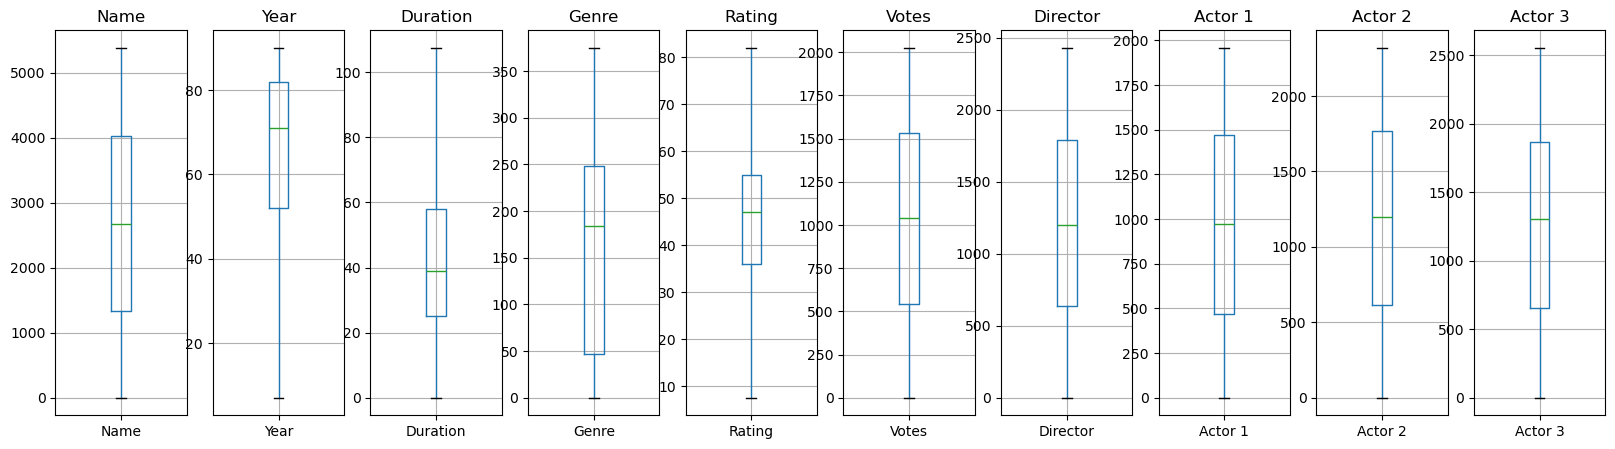

In [15]:
plot_boxplot(new_data)

In [16]:
features = new_data.drop('Rating',axis = 1)
labels = new_data['Rating']

In [18]:
import statsmodels.api as sm
model = sm.OLS(labels,features).fit()

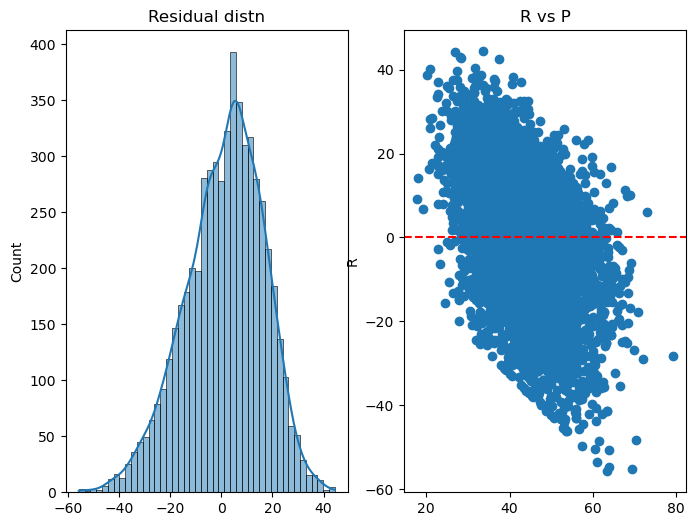

Model coef: 
 Name        0.001322
Year        0.085870
Duration    0.125718
Genre       0.034070
Votes       0.005623
Director    0.002777
Actor 1     0.004081
Actor 2     0.004047
Actor 3     0.004004
dtype: float64


In [19]:

residual = model.resid
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
sns.histplot(residual,kde = True)
plt.title('Residual distn')

plt.subplot(1,2,2)
plt.scatter(model.predict(features),residual)
plt.axhline(y = 0,color = 'red',linestyle = '--')
plt.title('R vs P')
plt.ylabel('R')
plt.show()

print('Model coef: \n',model.params)

In [22]:
prediction = model.predict(features)
print('r2: ',r2_score(labels,prediction))
print('MSE: ',mean_squared_error(labels,prediction))

r2:  -0.24009158280894138
MSE:  234.9482674722549


In [23]:
features = data.drop('Rating',axis = 1)
labels = data['Rating']
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [24]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

4.77

In [25]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

4.96

In [26]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

36.8

In [27]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

6.25

In [28]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

2.48

In [29]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

2.9

In [30]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [31]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest


100.0

In [32]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
7,Decision Tree,100.00
1,KNN,36.80
4,Naive Bayes,6.25
0,Support Vector Machines,4.96
2,Logistic Regression,4.77
6,Stochastic Gradient Decent,2.90
5,Perceptron,2.48
